In [71]:
#after deleting coloumns and filtering

import pandas as pd 
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 





In [72]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [73]:
df1.shape


(13320, 9)

In [74]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [75]:
df1.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   

In [76]:
#2 to find the categorical values and converting to numerical by map or lamda function
df1.groupby("area_type")["area_type"].agg("count")
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [77]:
df2=df1.drop(["availability","balcony","society","area_type"],axis='columns')
#deleting these coloumn due to high dimentionality


In [78]:
df2.tail()

,location,size,total_sqft,bath,price
13315,Whitefield,5 Bedroom,3453,4.0,231.0
13316,Richards Town,4 BHK,3600,5.0,400.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.0
13319,Doddathoguru,1 BHK,550,1.0,17.0


In [79]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [80]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [81]:
df3["size"].unique()#converting all these elements to numericals due to extreme dimentionaity

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [82]:
#2
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))



<ipython-input-82-bf9f54b2d1a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))


In [83]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [84]:
#dropping size coloumn 
df1.drop(["size"],axis=1,inplace=True)

In [85]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [86]:
#creating and verifying function to perform averaging of sqrt which has inapropriate format #wrfm wronf format
def wrfm(x):
    try:
        float(x)
    except:
        return False
    return True
    
    

In [87]:
wrfm(344)

True

In [88]:
wrfm(324)

True

In [89]:
df3[~df3["total_sqft"].apply(wrfm)].count()

location      190
size          190
total_sqft    190
bath          190
price         190
bhk           190
dtype: int64

In [138]:
df3[~df3["total_sqft"].apply(wrfm)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [91]:
#totally 190 values are in that format which has to be converted to normal format using this function
def normalise(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    


In [92]:
normalise("3319-3391")

3355.0

In [93]:
df4=df3.copy()

In [94]:
df4['total_sqft']=df4['total_sqft'].apply(normalise)

In [95]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [96]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [97]:
#copy df3 to another df4 for further changes for adding new coloumn 
df5=df4.copy()

In [98]:
#introducing a new coloumn price_per_sqt with the help of 2 coloumn and deleting those coloumns to reudce dimenstionality
df5["price_per_sqt"]=df5["price"]*100000/df5["total_sqft"]

In [99]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [100]:
#day2
#10/9/22
#lets check the location attribute which is very important and reduce its dimentionality 
len(df5.location.unique())



1304

In [101]:
#so there are over 1304 loctaions which are very high in number and can easily affect the onehotencoding process so lets reduce it to simpler form 
df5.location=df5.location.apply(lambda x:x.strip())
location_1=df5['location'].value_counts(ascending=False)

location_1

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [102]:
#3from this we can find out there are lot locations which has less than 10 which iam sepreately going to convert it to "other loactions" 
loc_10=location_1[location_1<=10]
len(loc_10)

1052

In [103]:
df5.location=df5.location.apply(lambda x :"other places" if x  in(loc_10) else x)

In [104]:
#verification of the above process(#3)
df5.loc[98]

location         other places
size                    2 BHK
total_sqft             1200.0
bath                      2.0
price                    65.0
bhk                         2
price_per_sqt     5416.666667
Name: 98, dtype: object

In [105]:
len(df5.location.unique())

242

In [106]:
#we have reduced the locations column from 1306 to 242 
df5.tail(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqt
13310,Rachenahalli,2 BHK,1050.0,2.0,52.71,2,5020.000000
13311,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.00,7,16666.666667
13312,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724.247227
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237.918216
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other places,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319
13319,Doddathoguru,1 BHK,550.0,1.0,17.00,1,3090.909091


In [107]:
len(df5)

13246

In [108]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [109]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqt)
        st = np.std(subdf.price_per_sqt)
        reduced_df = subdf[(subdf.price_per_sqt>(m-st)) & (subdf.price_per_sqt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

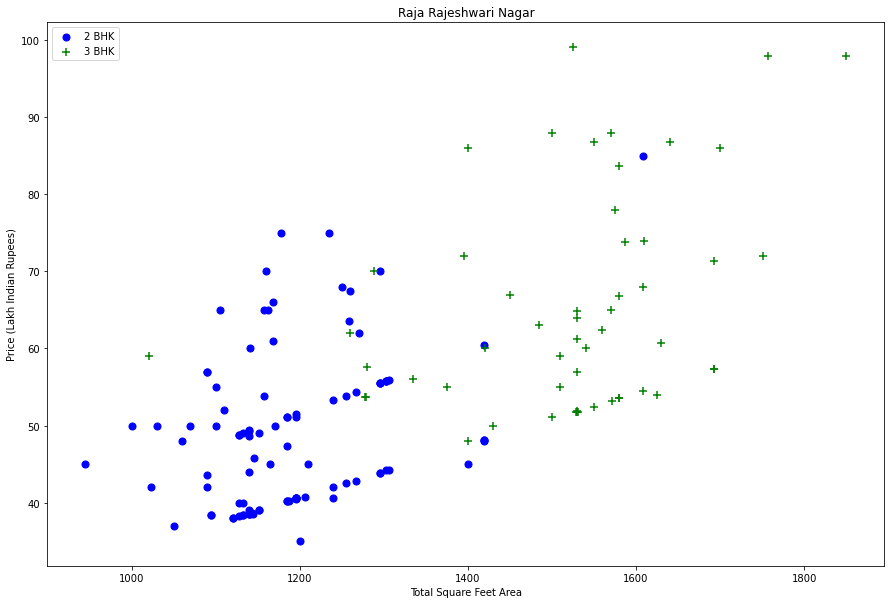

In [110]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Raja Rajeshwari Nagar")

In [111]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqt),
                'std': np.std(bhk_df.price_per_sqt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape



(7329, 7)

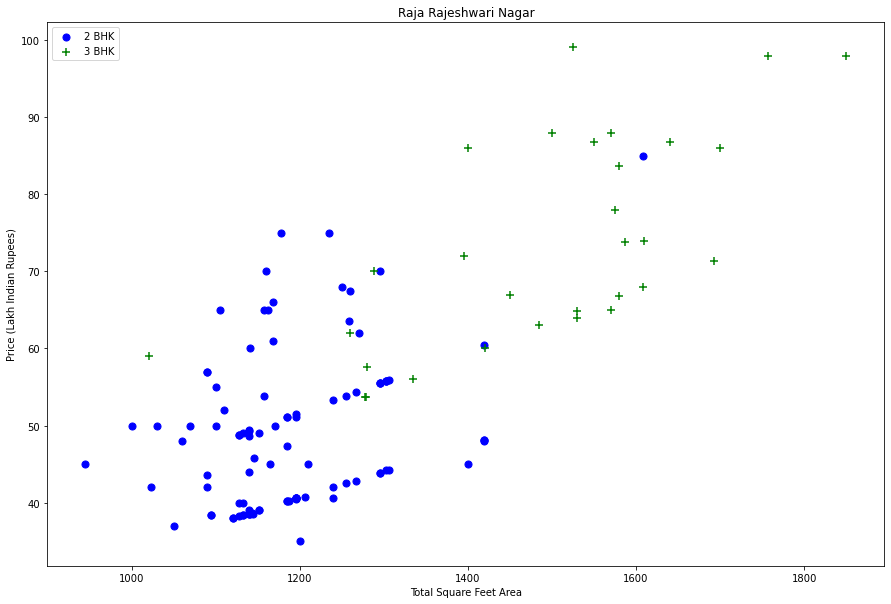

In [112]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Raja Rajeshwari Nagar")

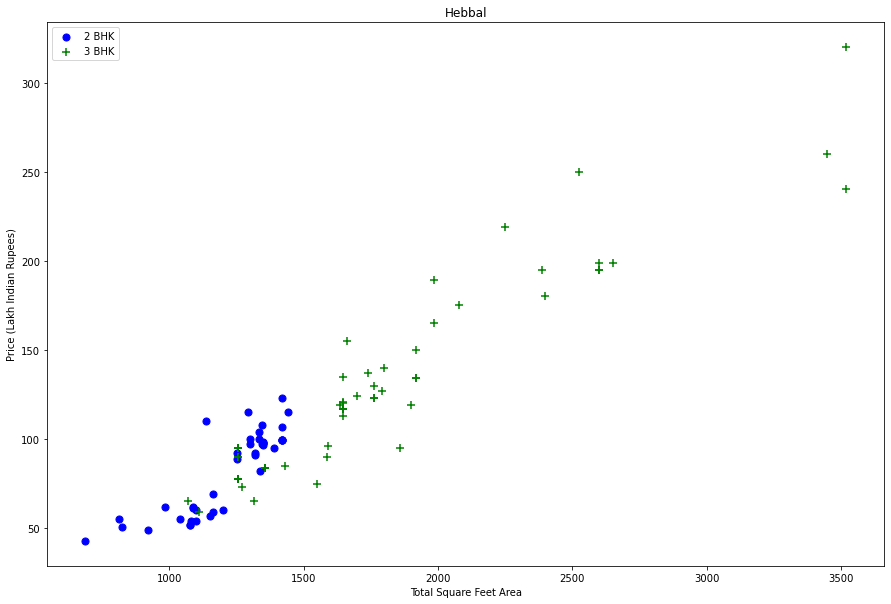

In [113]:
plot_scatter_chart(df7,"Hebbal")

In [114]:
#outlier removal
df8.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

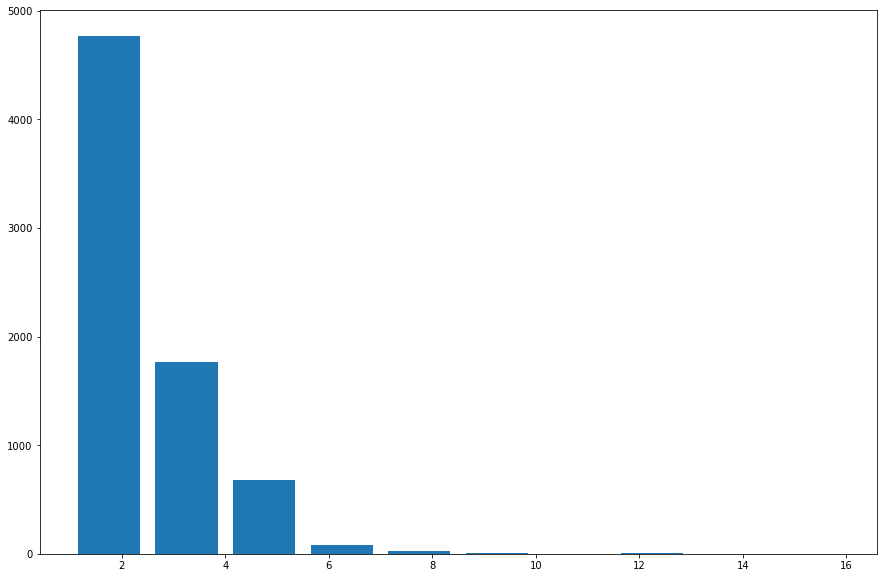

In [115]:
plt.hist(df8.bath,rwidth=0.8)


In [116]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqt
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other places,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other places,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other places,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other places,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [117]:
df9=df8[df8.bath<df8.bath+2]
df9.shape

(7329, 7)

In [118]:
df9.info

<bound method DataFrame.info of                   location       size  total_sqft  bath  price  bhk  \
0      1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
1      1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2      1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
3      1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
4      1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
...                    ...        ...         ...   ...    ...  ...   
10232         other places      2 BHK      1200.0   2.0   70.0    2   
10233         other places      1 BHK      1800.0   1.0  200.0    1   
10236         other places      2 BHK      1353.0   2.0  110.0    2   
10237         other places  1 Bedroom       812.0   1.0   26.0    1   
10240         other places      4 BHK      3600.0   5.0  400.0    4   

       price_per_sqt  
0       15017.543860  
1       11901.840491  
2       12533.333333  
3       10833.333333  


In [119]:
df10 = df9.drop(['price_per_sqt'],axis='columns')
df10.head(3)

,location,size,total_sqft,bath,price,bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3


In [139]:
#one hot encoding
dummies = pd.get_dummies(df10.location)
dummies.head(100)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other places
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df11 = pd.concat([df10,dummies.drop('other places',axis='columns')],axis='columns')
df11.head()

,location,size,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:

df12 = df11.drop('location',axis='columns')
df12.head(2)
df12.drop(["size"],axis=1,inplace=True)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df12.shape

(7329, 245)

In [124]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X.shape

(7329, 244)

In [126]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [127]:
len(y)

7329

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [129]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8909987705740484

In [130]:
#k fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81924325, 0.86698523, 0.86457433, 0.8857566 , 0.86309462])

In [131]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)
    

,model,best_score,best_params
0,linear_regression,0.859931,{'normalize': True}
1,lasso,0.701187,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.768868,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [132]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [133]:
predict_price('1st Phase JP Nagar',10000, 13, 8)

845.5177470552666

In [134]:
predict_price('Electronic City Phase II',1000, 3, 4)

24.410880587881053

In [135]:
predict_price("Raja Rajeshwari Nagar",800, 2, 2)

14.558295902449913

In [136]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [137]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))